In [41]:
import pandas as pd
import gender_guesser.detector as gender
import re
import time
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv('Data/data.csv')

In [55]:
data.head(50)

,Day,Facility,Booking Time,Booking Status,Booking Reference Number,Booked for User Name,Booked for User Org Unit,Booked for User Email Address,Use Type,Purpose of Booking,gender
0,"11 February 2020, Tuesday",SIS GSR 2-1,19:00,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming,unknown
1,"11 February 2020, Tuesday",SIS GSR 2-1,19:30,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming,unknown
2,"11 February 2020, Tuesday",SIS GSR 2-1,20:00,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming,unknown
3,"11 February 2020, Tuesday",SIS GSR 2-1,20:30,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming,unknown
4,"11 February 2020, Tuesday",SIS GSR 2-2,11:30,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting,female
5,"11 February 2020, Tuesday",SIS GSR 2-2,12:00,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting,female
6,"11 February 2020, Tuesday",SIS GSR 2-2,12:30,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting,female
7,"11 February 2020, Tuesday",SIS GSR 2-2,13:00,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting,female
8,"11 February 2020, Tuesday",SIS GSR 2-2,13:30,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting,female
9,"11 February 2020, Tuesday",SIS GSR 2-2,14:00,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting,female


In [57]:
data1 = data

In [60]:
data_unexp = pd.read_csv('Data/data_unexpanded.csv')
data_unexp = data_unexp.drop(columns=['gender'])

In [61]:
data_unexp

,Unnamed: 0,Day,Facility,Booking Time,Booking Status,Booking Reference Number,Booked for User Name,Booked for User Org Unit,Booked for User Email Address,Use Type,Purpose of Booking
0,0,"11 February 2020, Tuesday",SIS GSR 2-1,19:00-21:00,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming
1,1,"11 February 2020, Tuesday",SIS GSR 2-2,11:30-15:30,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting
2,2,"11 February 2020, Tuesday",SIS GSR 2-2,15:30-19:30,Confirmed,BK-20200203-001315,"CHUA ZHI NING, CHARLOTTE",Student,znchua.2019@sis.smu.edu.sg,AdHoc,study
3,3,"11 February 2020, Tuesday",SIS GSR 2-3,12:00-15:00,Confirmed,BK-20200129-001198,LIM JIA WEN,Student,jiawen.lim.2018@business.smu.edu.sg,AdHoc,study
4,4,"11 February 2020, Tuesday",SIS GSR 2-3,15:00-17:00,Confirmed,BK-20200210-001217,"LEK JAN YEE, LOIS",Student,lois.lek.2018@sis.smu.edu.sg,AdHoc,Meeting
...,...,...,...,...,...,...,...,...,...,...,...
5303,674,"29 January 2020, Wednesday",SOL-B1.11-GS,16:00-17:00,Confirmed,BK-20200128-000154,NATALIE SHAUNA TAN,Student,natalietan.2019@business.smu.edu.sg,Academic,Meeting
5304,675,"29 January 2020, Wednesday",SOL-B1.11-GS,17:00-18:30,Confirmed,BK-20200127-000085,"CHENG SIN HUI, CHELSEA",Student,shcheng.2017@socsc.smu.edu.sg,AdHoc,meeting
5305,676,"29 January 2020, Wednesday",SOL-B1.11-GS,18:30-21:30,Confirmed,BK-20200128-001211,MOHAMED SHAFIE BIN ALLAMEEN,Student,mohamedsa.2017@law.smu.edu.sg,AdHoc,meeting
5306,677,"29 January 2020, Wednesday",SOL-B1.12-GS,12:00-16:00,Confirmed,BK-20200115-000789,DARRYL HOR JUN HENG,Student,darryl.hor.2018@law.smu.edu.sg,AdHoc,study


In [62]:
data2 = data_unexp

In [65]:
# remove non-student bookings
data2 = data2.drop(data2[data2['Booked for User Org Unit'] != 'Student'].index)

In [67]:
data2['Booked for User Org Unit'].value_counts()

Student    5043
Name: Booked for User Org Unit, dtype: int64

# function to get the school of the booker

In [70]:
# function to get the school of the booker
def _get_school(email):
    email_lst = email.split('@')
    end = email_lst[1]
    end_lst = end.split(".")
    school = end_lst[0]
    if school == 'socsc' or school == 'economics':
        return 'soe/soss'
    elif school == 'accountancy':
        return 'soa'
    elif school == 'business':
        return 'sob'
    else:
        return school

In [71]:
data3 = data2

In [73]:
data3['Bookers School'] = data3['Booked for User Email Address'].apply(lambda x: _get_school(x))

In [74]:
data3

,Unnamed: 0,Day,Facility,Booking Time,Booking Status,Booking Reference Number,Booked for User Name,Booked for User Org Unit,Booked for User Email Address,Use Type,Purpose of Booking,Bookers School
0,0,"11 February 2020, Tuesday",SIS GSR 2-1,19:00-21:00,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming,sis
1,1,"11 February 2020, Tuesday",SIS GSR 2-2,11:30-15:30,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting,sis
2,2,"11 February 2020, Tuesday",SIS GSR 2-2,15:30-19:30,Confirmed,BK-20200203-001315,"CHUA ZHI NING, CHARLOTTE",Student,znchua.2019@sis.smu.edu.sg,AdHoc,study,sis
3,3,"11 February 2020, Tuesday",SIS GSR 2-3,12:00-15:00,Confirmed,BK-20200129-001198,LIM JIA WEN,Student,jiawen.lim.2018@business.smu.edu.sg,AdHoc,study,sob
4,4,"11 February 2020, Tuesday",SIS GSR 2-3,15:00-17:00,Confirmed,BK-20200210-001217,"LEK JAN YEE, LOIS",Student,lois.lek.2018@sis.smu.edu.sg,AdHoc,Meeting,sis
...,...,...,...,...,...,...,...,...,...,...,...,...
5303,674,"29 January 2020, Wednesday",SOL-B1.11-GS,16:00-17:00,Confirmed,BK-20200128-000154,NATALIE SHAUNA TAN,Student,natalietan.2019@business.smu.edu.sg,Academic,Meeting,sob
5304,675,"29 January 2020, Wednesday",SOL-B1.11-GS,17:00-18:30,Confirmed,BK-20200127-000085,"CHENG SIN HUI, CHELSEA",Student,shcheng.2017@socsc.smu.edu.sg,AdHoc,meeting,soe/soss
5305,676,"29 January 2020, Wednesday",SOL-B1.11-GS,18:30-21:30,Confirmed,BK-20200128-001211,MOHAMED SHAFIE BIN ALLAMEEN,Student,mohamedsa.2017@law.smu.edu.sg,AdHoc,meeting,law
5306,677,"29 January 2020, Wednesday",SOL-B1.12-GS,12:00-16:00,Confirmed,BK-20200115-000789,DARRYL HOR JUN HENG,Student,darryl.hor.2018@law.smu.edu.sg,AdHoc,study,law


In [75]:
data3.groupby('Bookers School')['Facility']

In [47]:
uniform_data = np.random.rand(10, 12)

In [48]:
uniform_data

array([[0.09702504, 0.40176207, 0.39727167, 0.66592301, 0.94751797,
        0.11661922, 0.29391147, 0.80724177, 0.97769781, 0.39347819,
        0.51979305, 0.26827386],
       [0.55200641, 0.29041285, 0.56743212, 0.91204044, 0.3443671 ,
        0.31772476, 0.46757243, 0.40672333, 0.69555853, 0.16420875,
        0.43947636, 0.29926304],
       [0.47500228, 0.96320541, 0.79137505, 0.1407656 , 0.69579571,
        0.2452366 , 0.70605095, 0.62876111, 0.9443107 , 0.02725073,
        0.52190528, 0.0324464 ],
       [0.88291834, 0.94169248, 0.56759472, 0.27286257, 0.13134247,
        0.89383553, 0.72508995, 0.40848177, 0.61701167, 0.49683519,
        0.80366594, 0.93428215],
       [0.41109776, 0.82343763, 0.86530948, 0.88415613, 0.41769261,
        0.89120449, 0.79041638, 0.81461664, 0.62536323, 0.94864215,
        0.90540209, 0.2759808 ],
       [0.78351943, 0.1163584 , 0.29048141, 0.14991156, 0.93230514,
        0.21494058, 0.07794295, 0.02638349, 0.92498811, 0.83821826,
        0.41722868,

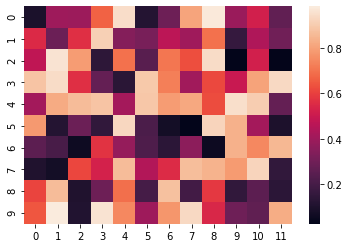

In [49]:
ax = sns.heatmap(uniform_data)

In [53]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


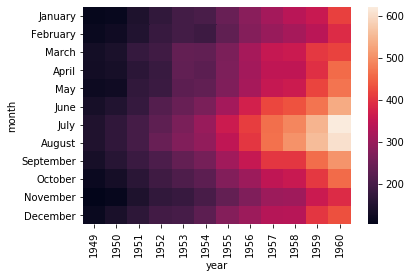

In [51]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

## Function to get gender of the booker

In [7]:
# function get gender of the booker
def _get_gender(name):
    chi_sn = ['tan', 'lim', 'lee', 'ng', 'ong', 'wong', 'goh', 'chua', 'chan', 'koh', 'teo', 'ang', 'yeo', 'tay', 'ho', 'low', 'toh', 'sim', 'chong', 'chia']
    d = gender.Detector()
    remove = ', '
    # remove all the non-caps as they are either staff/CCA groups
    if name.isupper() == False:
        return None
    
    # convert entire name to lowercase for easier manipulation
    name = name.lower()
    
    # get gender thru first name if word contains ','
    if ',' in name:
        i = name.index(',')
        word = name[i+1:]
        if word[0] in remove:
            word = word[1:]
        if word[len(word)-1] in remove:
            word = word[:-1]
        word = word.capitalize()
        return d.get_gender(word)
    
    # get gender in common connectors of muslim names
    if 'binte' in name or 'bte' in name or 'bin' in name or 'binti' in name:
        if 'bin' == name:
            return 'male'
        else:
            return 'female'
    
    # get gender by looping thru all parts of the name, removing common surnames (eg. Tan, Lim)
    # get predicted gender of each part of the name
    # eg. Jho Low Xiao Ming => ['unknown', 'unknown', 'andy', 'andy'] (gender_list)
    # finally, get gender by analysing the output-ed gender_list
    else:
        name_list = name.split(' ')
        gender_list = []
        for word in name_list:
            if word[0] in remove:
                word = word[1:]
            if word[len(word)-1] in remove:
                word = word[:-1]
            if word in chi_sn:
                continue
            word = word.capitalize()
            gender_list.append(d.get_gender(word))
            
        # get gender by first part of the name or last part of the name
        # eg. Joe Low Xiao Ming or Low Xiao Ming Joe
        if gender_list[0] == 'male' and gender_list[-1] != 'female':
            return 'male'
        if gender_list[0] == 'female' and gender_list[-1] != 'male':
            return 'female'
        if gender_list[-1] == 'male' and gender_list[0] != 'female':
            return 'male'
        if gender_list[-1] == 'female' and gender_list[0] != 'male':
            return 'female'
        
        # get gender by appending predicted gender of all parts of the name into a list, then getting the mode of the list
        else:
            temp = []
            for gender_pred in gender_list:
                match = re.search('male|female|andy|unknown', gender_pred)
                temp.append(match.group())
            return max(set(temp), key=temp.count) # returns the max 

In [1]:
# function get gender of the booker
# edit: implement dictionary to reduce computational time
#       dictionary = {name: gender}

#def _get_gender2(name, gend_dict):
    
    if name in gend_dict:
        return gend_dict[name], gend_dict
    
    else:
        gender = _get_gender(name)
        gend_dict[name] = gender
        return gender, gend_dict